In [48]:
import pandas as pd
import geopandas as gpd
from shapely import wkt
import contextily as cx
from tqdm import tqdm


In [3]:
df = pd.read_csv('../data/dc.broadbandnow.broadband.prices/01073_2023_broadband_prices.csv.xz')
df

,speed,down_up,price,name,type,address,success
0,5000 Mbps,Download,180.00,AT&T Fiber,Internet 5000,"2501 1ST AVE S, BIRMINGHAM, AL, 35210",True
1,5000 Mbps,Upload,180.00,AT&T Fiber,Internet 5000,"2501 1ST AVE S, BIRMINGHAM, AL, 35210",True
2,2000 Mbps,Download,110.00,AT&T Fiber,Internet 2000,"2501 1ST AVE S, BIRMINGHAM, AL, 35210",True
3,2000 Mbps,Upload,110.00,AT&T Fiber,Internet 2000,"2501 1ST AVE S, BIRMINGHAM, AL, 35210",True
4,1000 Mbps,Download,80.00,AT&T Fiber,Internet 1000,"2501 1ST AVE S, BIRMINGHAM, AL, 35210",True
...,...,...,...,...,...,...,...
1427490,3 Mbps,Upload,109.99,HughesNet,Internet Only,"9324 8TH AVE N, BIRMINGHAM, AL, 35206",True
1427491,25 Mbps,Download,139.99,HughesNet,Internet Only,"9324 8TH AVE N, BIRMINGHAM, AL, 35206",True
1427492,3 Mbps,Upload,139.99,HughesNet,Internet Only,"9324 8TH AVE N, BIRMINGHAM, AL, 35206",True
1427493,25 Mbps,Download,159.99,HughesNet,Internet Only,"9324 8TH AVE N, BIRMINGHAM, AL, 35206",True


In [59]:
df['name'].unique()

array(['AT&T Fiber', 'Spectrum', 'EarthLink Fiber', 'Xfinity',
       'Mediacom Cable', 'T-Mobile 5G Home Internet',
       'CenturyLink Fiber Gigabit', 'Verizon Fios', 'Windstream',
       'CTV Beam', 'WOW!'], dtype=object)

In [4]:
df['speed'] = df['speed'].apply(lambda x: int(x.split(' ')[0]))
df

,speed,down_up,price,name,type,address,success
0,5000,Download,180.00,AT&T Fiber,Internet 5000,"2501 1ST AVE S, BIRMINGHAM, AL, 35210",True
1,5000,Upload,180.00,AT&T Fiber,Internet 5000,"2501 1ST AVE S, BIRMINGHAM, AL, 35210",True
2,2000,Download,110.00,AT&T Fiber,Internet 2000,"2501 1ST AVE S, BIRMINGHAM, AL, 35210",True
3,2000,Upload,110.00,AT&T Fiber,Internet 2000,"2501 1ST AVE S, BIRMINGHAM, AL, 35210",True
4,1000,Download,80.00,AT&T Fiber,Internet 1000,"2501 1ST AVE S, BIRMINGHAM, AL, 35210",True
...,...,...,...,...,...,...,...
1427490,3,Upload,109.99,HughesNet,Internet Only,"9324 8TH AVE N, BIRMINGHAM, AL, 35206",True
1427491,25,Download,139.99,HughesNet,Internet Only,"9324 8TH AVE N, BIRMINGHAM, AL, 35206",True
1427492,3,Upload,139.99,HughesNet,Internet Only,"9324 8TH AVE N, BIRMINGHAM, AL, 35206",True
1427493,25,Download,159.99,HughesNet,Internet Only,"9324 8TH AVE N, BIRMINGHAM, AL, 35206",True


In [5]:
df = df[df['speed'] > 100] # we limit to speeds of above 100 Mb
df

,speed,down_up,price,name,type,address,success
0,5000,Download,180.00,AT&T Fiber,Internet 5000,"2501 1ST AVE S, BIRMINGHAM, AL, 35210",True
1,5000,Upload,180.00,AT&T Fiber,Internet 5000,"2501 1ST AVE S, BIRMINGHAM, AL, 35210",True
2,2000,Download,110.00,AT&T Fiber,Internet 2000,"2501 1ST AVE S, BIRMINGHAM, AL, 35210",True
3,2000,Upload,110.00,AT&T Fiber,Internet 2000,"2501 1ST AVE S, BIRMINGHAM, AL, 35210",True
4,1000,Download,80.00,AT&T Fiber,Internet 1000,"2501 1ST AVE S, BIRMINGHAM, AL, 35210",True
...,...,...,...,...,...,...,...
1427413,200,Download,99.97,Spectrum,Spectrum Mi Plan + Internet + Voice,"9324 8TH AVE N, BIRMINGHAM, AL, 35206",True
1427415,200,Download,99.98,Spectrum,Spectrum Internet + TV,"9324 8TH AVE N, BIRMINGHAM, AL, 35206",True
1427417,200,Download,114.97,Spectrum,Spectrum Internet + TV + Voice,"9324 8TH AVE N, BIRMINGHAM, AL, 35206",True
1427419,115,Download,50.00,T-Mobile 5G Home Internet,Home Internet w/ Autopay,"9324 8TH AVE N, BIRMINGHAM, AL, 35206",True


In [8]:
# filter addresses for minimum value
dfs = []
for address in tqdm(df['address'].unique()):
    pdf = df[df['address']== address]
    dfs.append(pdf.nsmallest(1, 'speed'))

tdf = pd.concat(dfs)
tdf

100%|████████████████████████████████████████████████████████████████████████████████████████████| 15040/15040 [01:40<00:00, 149.15it/s]


,speed,down_up,price,name,type,address,success
23,200,Download,49.99,Spectrum,Spectrum Internet®,"2501 1ST AVE S, BIRMINGHAM, AL, 35210",True
132,200,Download,49.99,Spectrum,Spectrum Internet®,"1726 CLARENDON AVE, BRIGHTON, AL, 35020",True
239,200,Download,49.99,Spectrum,Spectrum Internet®,"541 RUSSET BEND DR, BIRMINGHAM, AL, 35244",True
344,200,Download,49.99,Spectrum,Spectrum Internet®,"4432 TODD AVE SW, BIRMINGHAM, AL, 35221",True
493,115,Download,50.00,T-Mobile 5G Home Internet,Home Internet w/ Autopay,"24 PARK AVE, BESSEMER, AL, 35023",True
...,...,...,...,...,...,...,...
1427009,200,Download,49.99,Spectrum,Spectrum Internet®,"1208 IVY BROOK CIR, BIRMINGHAM, AL, 35209",True
1427112,200,Download,49.99,Spectrum,Spectrum Internet®,"1334 FULTON AVE, TARRANT, AL, 35217",True
1427214,115,Download,50.00,T-Mobile 5G Home Internet,Home Internet w/ Autopay,"13 23RD AVE S, BIRMINGHAM, AL, 35205",True
1427313,200,Download,49.99,Spectrum,Spectrum Internet®,"224 ELM ST SW, BESSEMER, AL, 35022",True


In [12]:
tdf['price'].describe()

count    15040.000000
mean        49.797027
std          2.366068
min         19.990000
25%         49.990000
50%         50.000000
75%         50.000000
max         70.000000
Name: price, dtype: float64

# Join with the spatial data and visualize

In [35]:
alabama = gpd.read_file('../data/shapefiles/tl_2020_01_tabblock20.zip')
al = alabama[alabama['COUNTYFP20'] == '073']
al

,STATEFP20,COUNTYFP20,TRACTCE20,BLOCKCE20,GEOID20,NAME20,MTFCC20,UR20,UACE20,UATYPE20,FUNCSTAT20,ALAND20,AWATER20,INTPTLAT20,INTPTLON20,HOUSING20,POP20,geometry
162,01,073,011210,1060,010730112101060,Block 1060,G5040,U,07786,U,S,203568,0,+33.6634300,-086.6908283,88,216,"POLYGON ((-86.70033 33.66577, -86.70033 33.665..."
163,01,073,011205,1067,010730112051067,Block 1067,G5040,U,07786,U,S,193805,0,+33.6839540,-086.6861249,29,51,"POLYGON ((-86.69024 33.68323, -86.68986 33.684..."
164,01,073,011304,1006,010730113041006,Block 1006,G5040,R,NaN,NaN,S,9232,0,+33.7620649,-086.7844527,4,1,"POLYGON ((-86.78561 33.76202, -86.78481 33.762..."
165,01,073,005910,2010,010730059102010,Block 2010,G5040,U,07786,U,S,5071,0,+33.6400119,-086.7041945,0,0,"POLYGON ((-86.70449 33.63981, -86.70436 33.640..."
166,01,073,010604,5023,010730106045023,Block 5023,G5040,U,07786,U,S,5444,0,+33.4788236,-086.9110512,5,8,"POLYGON ((-86.91159 33.47908, -86.91050 33.479..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
185831,01,073,011004,1037,010730110041037,Block 1037,G5040,R,NaN,NaN,S,58187,0,+33.5235283,-086.5497686,0,0,"POLYGON ((-86.55197 33.52199, -86.55189 33.522..."
185840,01,073,012910,1000,010730129101000,Block 1000,G5040,U,07786,U,S,3878,566,+33.4325789,-086.7141356,0,0,"POLYGON ((-86.71488 33.43314, -86.71433 33.432..."
185952,01,073,005500,2028,010730055002028,Block 2028,G5040,U,07786,U,S,133013,0,+33.5763289,-086.7913023,0,0,"POLYGON ((-86.79381 33.57535, -86.79350 33.575..."
185953,01,073,011116,2031,010730111162031,Block 2031,G5040,R,NaN,NaN,S,0,5677,+33.6950588,-086.5851913,0,0,"POLYGON ((-86.58538 33.69504, -86.58535 33.695..."


In [16]:
gdf = pd.read_csv('../data/01073_one_address_per_block.csv')
gdf

,address,geoid20,lon,lat,geometry,centroid
0,"9256 PARKWAY E, BIRMINGHAM, AL, 35206",10730001001000,-86.700589,33.587030,"POLYGON ((-86.702001 33.587957, -86.701786 33....",POINT (-86.69980215252554 33.589449975959404)
1,"9002 PARKWAY E, BIRMINGHAM, AL, 35206",10730001001002,-86.716150,33.577447,"POLYGON ((-86.718615 33.577959, -86.716288 33....",POINT (-86.70931800982687 33.585290442879064)
2,"9001 ROEBUCK BLVD, BIRMINGHAM, AL, 35206",10730001001003,-86.708240,33.583977,"POLYGON ((-86.711173 33.581161, -86.711101 33....",POINT (-86.70888940717963 33.5829721121745)
3,"116 94TH ST N, BIRMINGHAM, AL, 35206",10730001001004,-86.715152,33.588869,"POLYGON ((-86.719281 33.581638, -86.719147 33....",POINT (-86.71476793686115 33.58580244498006)
4,"101 94TH ST N, BIRMINGHAM, AL, 35206",10730001001005,-86.714927,33.588854,"POLYGON ((-86.716521 33.588634, -86.716439 33....",POINT (-86.71563553503205 33.58860715803149)
...,...,...,...,...,...,...
15310,"5234 COTTAGE LN, BIRMINGHAM, AL, 35226",10730144152012,-86.869407,33.362234,"POLYGON ((-86.869641 33.361759, -86.869569 33....",POINT (-86.869311135407 33.3621089765314)
15311,"5302 COTTAGE LN, BIRMINGHAM, AL, 35226",10730144152015,-86.870224,33.360721,"POLYGON ((-86.87211 33.356841, -86.872061 33.3...",POINT (-86.87085499910671 33.35876491281303)
15312,"129 COBBLESTONE LN, BIRMINGHAM, AL, 35244",10730144152017,-86.873603,33.349815,"POLYGON ((-86.87791 33.348207, -86.877876 33.3...",POINT (-86.8742913777893 33.348216662686994)
15313,"124 COBBLESTONE LN, BIRMINGHAM, AL, 35244",10730144152018,-86.873539,33.349793,"POLYGON ((-86.873893 33.350597, -86.873852 33....",POINT (-86.87332028866619 33.35043097691216)


In [17]:
mdf = pd.merge(tdf, gdf, on='address', how='inner')
mdf

,speed,down_up,price,name,type,address,success,geoid20,lon,lat,geometry,centroid
0,200,Download,49.99,Spectrum,Spectrum Internet®,"2501 1ST AVE S, BIRMINGHAM, AL, 35210",True,10730126022012,-86.701168,33.541860,"POLYGON ((-86.701249 33.541815, -86.700278 33....",POINT (-86.70058408956815 33.54192571251624)
1,200,Download,49.99,Spectrum,Spectrum Internet®,"1726 CLARENDON AVE, BRIGHTON, AL, 35020",True,10730103013010,-86.948300,33.396881,"POLYGON ((-86.948973 33.397219, -86.948947 33....",POINT (-86.94844764188356 33.39727784728813)
2,200,Download,49.99,Spectrum,Spectrum Internet®,"541 RUSSET BEND DR, BIRMINGHAM, AL, 35244",True,10730142084004,-86.888342,33.327355,"POLYGON ((-86.892429 33.329546, -86.891501 33....",POINT (-86.89029899404923 33.32825651125621)
3,200,Download,49.99,Spectrum,Spectrum Internet®,"4432 TODD AVE SW, BIRMINGHAM, AL, 35221",True,10730131004034,-86.899443,33.444049,"POLYGON ((-86.900407 33.445005, -86.90022 33.4...",POINT (-86.89965342677664 33.444518886347154)
4,115,Download,50.00,T-Mobile 5G Home Internet,Home Internet w/ Autopay,"24 PARK AVE, BESSEMER, AL, 35023",True,10730139021075,-86.978046,33.437202,"POLYGON ((-86.97897 33.439054, -86.978482 33.4...",POINT (-86.97728850988757 33.43777429087687)
...,...,...,...,...,...,...,...,...,...,...,...,...
15035,200,Download,49.99,Spectrum,Spectrum Internet®,"1208 IVY BROOK CIR, BIRMINGHAM, AL, 35209",True,10730107042030,-86.815465,33.450997,"POLYGON ((-86.815772 33.451639, -86.81558 33.4...",POINT (-86.8155297601531 33.451415070767)
15036,200,Download,49.99,Spectrum,Spectrum Internet®,"1334 FULTON AVE, TARRANT, AL, 35217",True,10730109004024,-86.774510,33.574726,"POLYGON ((-86.775762 33.57517, -86.773471 33.5...",POINT (-86.77473721402653 33.57493391049092)
15037,115,Download,50.00,T-Mobile 5G Home Internet,Home Internet w/ Autopay,"13 23RD AVE S, BIRMINGHAM, AL, 35205",True,10730051042002,-86.829992,33.481133,"POLYGON ((-86.832595 33.480141, -86.830562 33....",POINT (-86.83058293791495 33.479599191645164)
15038,200,Download,49.99,Spectrum,Spectrum Internet®,"224 ELM ST SW, BESSEMER, AL, 35022",True,10730141052012,-86.976352,33.373351,"POLYGON ((-86.979295 33.372555, -86.978964 33....",POINT (-86.9774978040215 33.3728933173167)


In [22]:
# convert to shapely objects
mdf['geometry'] = mdf['geometry'].apply(wkt.loads)
mdf['centroid'] = mdf['centroid'].apply(wkt.loads)
gdf = gpd.GeoDataFrame(mdf, crs='epsg:4326')
gdf

,speed,down_up,price,name,type,address,success,geoid20,lon,lat,geometry,centroid
0,200,Download,49.99,Spectrum,Spectrum Internet®,"2501 1ST AVE S, BIRMINGHAM, AL, 35210",True,10730126022012,-86.701168,33.541860,"POLYGON ((-86.70125 33.54181, -86.70028 33.542...",POINT (-86.70058408956815 33.54192571251624)
1,200,Download,49.99,Spectrum,Spectrum Internet®,"1726 CLARENDON AVE, BRIGHTON, AL, 35020",True,10730103013010,-86.948300,33.396881,"POLYGON ((-86.94897 33.39722, -86.94895 33.397...",POINT (-86.94844764188356 33.39727784728813)
2,200,Download,49.99,Spectrum,Spectrum Internet®,"541 RUSSET BEND DR, BIRMINGHAM, AL, 35244",True,10730142084004,-86.888342,33.327355,"POLYGON ((-86.89243 33.32955, -86.89150 33.330...",POINT (-86.89029899404923 33.32825651125621)
3,200,Download,49.99,Spectrum,Spectrum Internet®,"4432 TODD AVE SW, BIRMINGHAM, AL, 35221",True,10730131004034,-86.899443,33.444049,"POLYGON ((-86.90041 33.44501, -86.90022 33.445...",POINT (-86.89965342677664 33.444518886347154)
4,115,Download,50.00,T-Mobile 5G Home Internet,Home Internet w/ Autopay,"24 PARK AVE, BESSEMER, AL, 35023",True,10730139021075,-86.978046,33.437202,"POLYGON ((-86.97897 33.43905, -86.97848 33.439...",POINT (-86.97728850988757 33.43777429087687)
...,...,...,...,...,...,...,...,...,...,...,...,...
15035,200,Download,49.99,Spectrum,Spectrum Internet®,"1208 IVY BROOK CIR, BIRMINGHAM, AL, 35209",True,10730107042030,-86.815465,33.450997,"POLYGON ((-86.81577 33.45164, -86.81558 33.451...",POINT (-86.8155297601531 33.451415070767)
15036,200,Download,49.99,Spectrum,Spectrum Internet®,"1334 FULTON AVE, TARRANT, AL, 35217",True,10730109004024,-86.774510,33.574726,"POLYGON ((-86.77576 33.57517, -86.77347 33.575...",POINT (-86.77473721402653 33.57493391049092)
15037,115,Download,50.00,T-Mobile 5G Home Internet,Home Internet w/ Autopay,"13 23RD AVE S, BIRMINGHAM, AL, 35205",True,10730051042002,-86.829992,33.481133,"POLYGON ((-86.83259 33.48014, -86.83056 33.481...",POINT (-86.83058293791495 33.479599191645164)
15038,200,Download,49.99,Spectrum,Spectrum Internet®,"224 ELM ST SW, BESSEMER, AL, 35022",True,10730141052012,-86.976352,33.373351,"POLYGON ((-86.97929 33.37255, -86.97896 33.372...",POINT (-86.9774978040215 33.3728933173167)


In [49]:
gdf[gdf['price']== gdf['price'].min()]

,speed,down_up,price,name,type,address,success,geoid20,lon,lat,geometry,centroid
135,200,Download,19.99,Windstream,Internet Only,"5709 CARRINGTON WAY, TRUSSVILLE, AL, 35173",True,10730111141048,-86.527634,33.661321,"POLYGON ((-86.52759 33.66140, -86.52757 33.661...",POINT (-86.52643417106206 33.66193341768427)
198,200,Download,19.99,Windstream,Internet Only,"1455 ILLINOIS ST, LEEDS, AL, 35094",True,10730110022021,-86.558439,33.546177,"POLYGON ((-86.59166 33.54482, -86.59139 33.544...",POINT (-86.57154279243571 33.54702863485754)
406,200,Download,19.99,Windstream,Internet Only,"1525 ANDERSON ST, LEEDS, AL, 35094",True,10730110022037,-86.549853,33.547751,"POLYGON ((-86.54953 33.54823, -86.54815 33.547...",POINT (-86.54879766468795 33.54740469456408)
497,200,Download,19.99,Windstream,Internet Only,"8717 SUNSET DR, LEEDS, AL, 35094",True,10730110031004,-86.533370,33.548632,"POLYGON ((-86.53419 33.54863, -86.53332 33.548...",POINT (-86.53273901510586 33.547875041394676)
1108,200,Download,19.99,Windstream,Internet Only,"6720 DAVIS MOUNTAIN RD, LEEDS, AL, 35094",True,10730127042051,-86.617453,33.505406,"POLYGON ((-86.61767 33.50696, -86.61622 33.506...",POINT (-86.61703574839926 33.50630750758578)
...,...,...,...,...,...,...,...,...,...,...,...,...
14430,200,Download,19.99,Windstream,Internet Only,"7432 ROOSEVELT DR, LEEDS, AL, 35094",True,10730110042006,-86.564238,33.541061,"POLYGON ((-86.56465 33.54066, -86.56430 33.540...",POINT (-86.5633606198386 33.54085079119702)
14682,200,Download,19.99,Windstream,Internet Only,"1635 POOLE ST, LEEDS, AL, 35094",True,10730110031008,-86.533007,33.546253,"POLYGON ((-86.53312 33.54603, -86.53298 33.546...",POINT (-86.53215330406222 33.54622672924448)
14797,200,Download,19.99,Windstream,Internet Only,"7721 PINE AVE, LEEDS, AL, 35094",True,10730110041025,-86.542153,33.528811,"POLYGON ((-86.54230 33.52872, -86.54163 33.529...",POINT (-86.54133094832633 33.52868266774411)
14827,200,Download,19.99,Windstream,Internet Only,"3245 EASTERN VALLEY RD, LEEDS, AL, 35094",True,10730127041018,-86.620328,33.480345,"POLYGON ((-86.62117 33.47965, -86.62087 33.479...",POINT (-86.61661411077581 33.479345256930415)


Text(0.5, 1.0, 'Minimum price for 100 Mbps download in Jefferson County 01073')

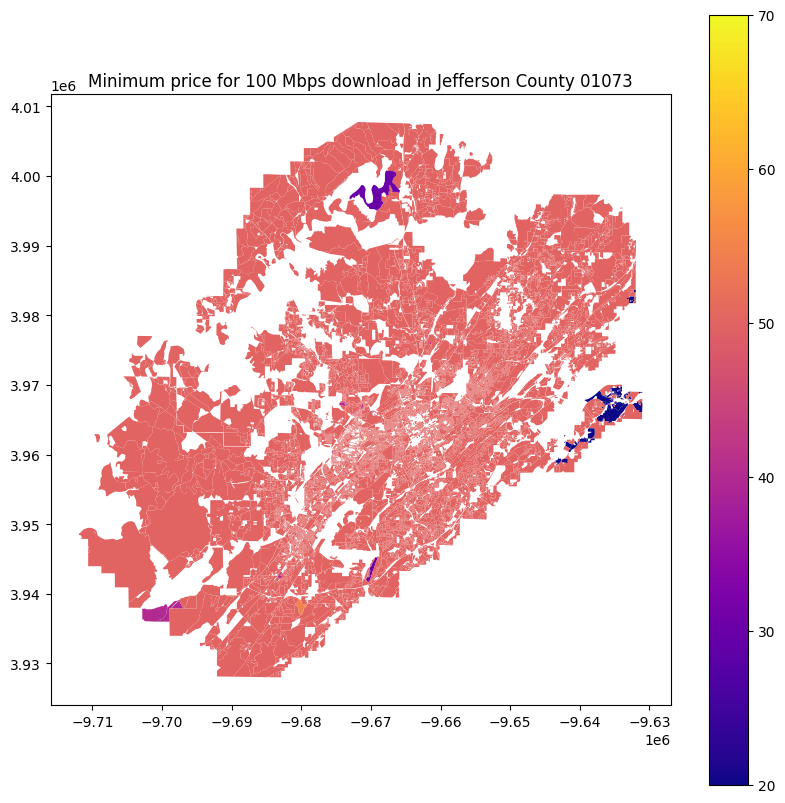

In [52]:
# gdf_wm = gdf_wm.set_geometry('centroid')
# gdf_wm = gdf.set_geometry('geometry')
gdf_wm = gdf.to_crs(epsg=3857) 
# al_wm = al.to_crs(epsg=3857)

ax = gdf_wm.plot(figsize=(10, 10), column='price', alpha=1, markersize=1, cmap='plasma', legend=True) # add block outlines
# al.plot(ax=ax, facecolor="none", edgecolor='black', lw=0.1)
ax.set_title('Minimum price for 100 Mbps download in Jefferson County 01073')
# cx.add_basemap(ax)

In [56]:
gdf_wm

,speed,down_up,price,name,type,address,success,geoid20,lon,lat,geometry
0,200,Download,49.99,Spectrum,Spectrum Internet®,"2501 1ST AVE S, BIRMINGHAM, AL, 35210",True,10730126022012,-86.701168,33.541860,"POLYGON ((-9651538.890 3967443.655, -9651430.7..."
1,200,Download,49.99,Spectrum,Spectrum Internet®,"1726 CLARENDON AVE, BRIGHTON, AL, 35020",True,10730103013010,-86.948300,33.396881,"POLYGON ((-9679115.399 3948147.612, -9679112.5..."
2,200,Download,49.99,Spectrum,Spectrum Internet®,"541 RUSSET BEND DR, BIRMINGHAM, AL, 35244",True,10730142084004,-86.888342,33.327355,"POLYGON ((-9672820.950 3939127.821, -9672717.6..."
3,200,Download,49.99,Spectrum,Spectrum Internet®,"4432 TODD AVE SW, BIRMINGHAM, AL, 35221",True,10730131004034,-86.899443,33.444049,"POLYGON ((-9673709.057 3954520.996, -9673688.2..."
4,115,Download,50.00,T-Mobile 5G Home Internet,Home Internet w/ Autopay,"24 PARK AVE, BESSEMER, AL, 35023",True,10730139021075,-86.978046,33.437202,"POLYGON ((-9682454.650 3953727.099, -9682400.3..."
...,...,...,...,...,...,...,...,...,...,...,...
15035,200,Download,49.99,Spectrum,Spectrum Internet®,"1208 IVY BROOK CIR, BIRMINGHAM, AL, 35209",True,10730107042030,-86.815465,33.450997,"POLYGON ((-9664287.532 3955406.073, -9664266.1..."
15036,200,Download,49.99,Spectrum,Spectrum Internet®,"1334 FULTON AVE, TARRANT, AL, 35217",True,10730109004024,-86.774510,33.574726,"POLYGON ((-9659833.639 3971899.390, -9659578.6..."
15037,115,Download,50.00,T-Mobile 5G Home Internet,Home Internet w/ Autopay,"13 23RD AVE S, BIRMINGHAM, AL, 35205",True,10730051042002,-86.829992,33.481133,"POLYGON ((-9666160.260 3959209.447, -9665933.9..."
15038,200,Download,49.99,Spectrum,Spectrum Internet®,"224 ELM ST SW, BESSEMER, AL, 35022",True,10730141052012,-86.976352,33.373351,"POLYGON ((-9682490.829 3944859.460, -9682453.9..."


In [1]:
gdf_wm.explore("price", "plasma")

NameError: name 'gdf_wm' is not defined